In [ ]:
#Import PyTorch and Matplotlib
import torch
from torch import nn
import matplotlib.pyplot as plt

#Check for pytorch version
torch.__version__

'2.2.1+cu121'

In [ ]:
#Setup device agnostic
device = "cuda" if torch.cuda.is_available() else "cpu"
print (f"Using device: {device}")

Using device: cpu


Data

In [ ]:
#Create some data using linear regression formular using y= weight * X + bias

weight = 0.7
bias = 0.3

#Create range values
start = 0
end = 1
step = 0.02

#Create X and y (features and labels)
X = torch.arange (start, end, step).unsqueeze (dim=1) #without unsqueeze, errors will pop up
y = weight * X + bias
X[:10], y[:10]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]))

In [ ]:
#Split data
train_split = int(0.80 * len(X))
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test =X[train_split:], y[train_split:]
len(X_train), len(y_train), len(X_test), len(y_test)

(40, 40, 10, 10)

In [ ]:
def plot_predictions(train_data=X_train,
                     train_labels=y_train,
                     test_data=X_test,
                     test_labels=y_test,
                     predictions=None):
  """
  Plots training data, test data and compares predictions.
  """
  plt.figure(figsize=(10, 7))

  # Plot training data in blue
  plt.scatter(train_data, train_labels, c="y", s=10, label="Training data")

  # Plot test data in green
  plt.scatter(test_data, test_labels, c="g", s=10, label="Testing data")

  if predictions is not None:
    # Plot the predictions in red (predictions were made on the test data)
    plt.scatter(test_data, predictions, c="r", s=4, label="Predictions")

  # Show the legend
  plt.legend(prop={"size": 14});

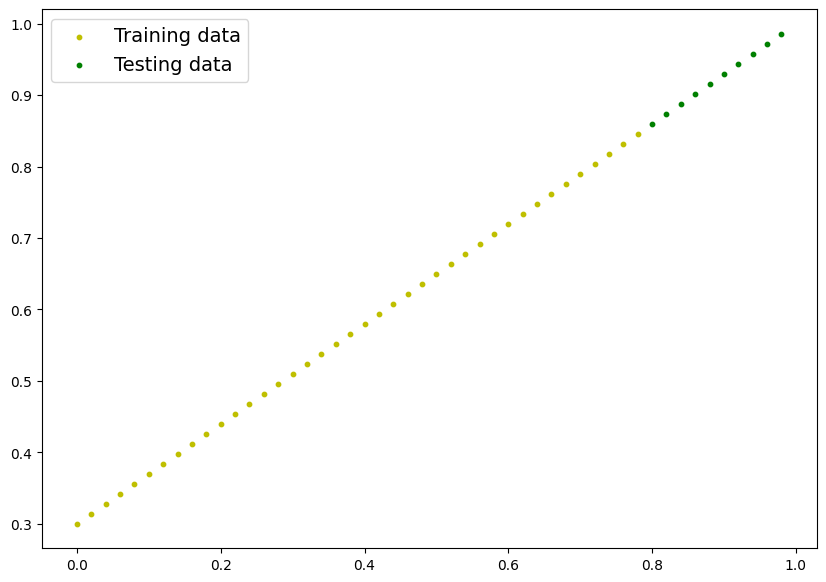

In [ ]:
#Plot data
#Note: If you don't have the plot prediction function, this will error

plot_predictions(X_train, y_train, X_test, y_test)

Building a pytorch model

In [ ]:
#Create linear model by subclassing nn.Module
class LinearRegressionModuleV2(nn.Module):
  def __init__(self):
    super().__init__()
    #Use nn.Linear() for creating the model parameters
    self.linear_layer = nn.Linear(in_features=1,
                                  out_features=1)

  def forward(self, x: torch.Tensor) -> torch.Tensor:
      return self.linear_layer(x)

#Set manual seed
torch.manual_seed(47)
model_1 = LinearRegressionModuleV2()
model_1, model_1.state_dict()

(LinearRegressionModuleV2(
   (linear_layer): Linear(in_features=1, out_features=1, bias=True)
 ),
 OrderedDict([('linear_layer.weight', tensor([[-0.8939]])),
              ('linear_layer.bias', tensor([-0.9002]))]))

In [ ]:
X_train[:3], y_train[:3]# Just to print out X and y values

(tensor([[0.0000],
         [0.0200],
         [0.0400]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280]]))

In [ ]:
#Check the model current device
next(model_1.parameters()).device

device(type='cpu')

In [ ]:
#Set the model to use the target device
model_1.to(device)#.to sends the parameter to the GPU memory that is if GPU is available else it send it to CPU
next(model_1.parameters()).device

device(type='cpu')

#Training our data

We need the following:

*Loss function
*Optimiser
*Training loop
*Testing loop

In [ ]:
#Set loss function
loss_fn = nn.L1Loss() #Same as Mean Absolute Error(MAE)

#Set our optimiser
optimiser = torch.optim.SGD(params=model_1.parameters(), #SDG stands for Socastic Gradient Descent.
                            lr=0.01)  #lr is Learning Rate. The higher the value the faster the lr and vice versa.

#Write a training loop
torch.manual_seed(47)

epochs = 200

#Put data on target device (device agnostic code for data)
X_train = X_train.to(device)
y_train = y_train.to(device)
X_test = X_test.to(device)
y_test = y_test.to(device)

for epoch in range(epochs):
  model_1.train()

  #1. Forward pass
  y_pred = model_1(X_train)

  #2. Calculate loss
  loss = loss_fn(y_pred, y_train)

  #3. Optimise zero grad
  optimiser.zero_grad()

  #4. Perform backpropagation
  loss.backward()

  #5. Optimse step
  optimiser.step()

  ###Testing
  model_1.eval()
  with torch.inference_mode():
    test_pred = model_1(X_test) #Forward pass

    test_loss = loss_fn(test_pred, y_test) #Calculate loss

  #Print out what's happening

  if epoch % 10 == 0:
    print(f"Epoch: {epoch} | Loss: {loss} | Test loss: {test_loss}")

Epoch: 0 | Loss: 0.17460304498672485 | Test loss: 0.4494878649711609
Epoch: 10 | Loss: 0.1699911504983902 | Test loss: 0.42834219336509705
Epoch: 20 | Loss: 0.1659911423921585 | Test loss: 0.41054219007492065
Epoch: 30 | Loss: 0.1621309518814087 | Test loss: 0.39477625489234924
Epoch: 40 | Loss: 0.15864093601703644 | Test loss: 0.38375648856163025
Epoch: 50 | Loss: 0.15515092015266418 | Test loss: 0.37273675203323364
Epoch: 60 | Loss: 0.15166090428829193 | Test loss: 0.3617169260978699
Epoch: 70 | Loss: 0.14817090332508087 | Test loss: 0.35069718956947327
Epoch: 80 | Loss: 0.14468088746070862 | Test loss: 0.3396774232387543
Epoch: 90 | Loss: 0.14120368659496307 | Test loss: 0.3293445110321045
Epoch: 100 | Loss: 0.1377648562192917 | Test loss: 0.32107222080230713
Epoch: 110 | Loss: 0.1343347728252411 | Test loss: 0.3134867250919342
Epoch: 120 | Loss: 0.1309000551700592 | Test loss: 0.30521443486213684
Epoch: 130 | Loss: 0.127461239695549 | Test loss: 0.2969421446323395
Epoch: 140 | Loss

In [ ]:
#Evaluate model
model_1.state_dict()

OrderedDict([('linear_layer.weight', tensor([[0.6954]])),
             ('linear_layer.bias', tensor([0.3093]))])

In [ ]:
weight, bias

(0.7, 0.3)

###Make and evaluate predictions and plot

In [ ]:
#Turn model into evaluation mode
model_1.eval()

#Make predictions on the test data
with torch.inference_mode():
  y_preds = model_1(X_test)
y_preds

tensor([[0.6641],
        [0.6678],
        [0.6715],
        [0.6752],
        [0.6789],
        [0.6827],
        [0.6864],
        [0.6901],
        [0.6938],
        [0.6975]])

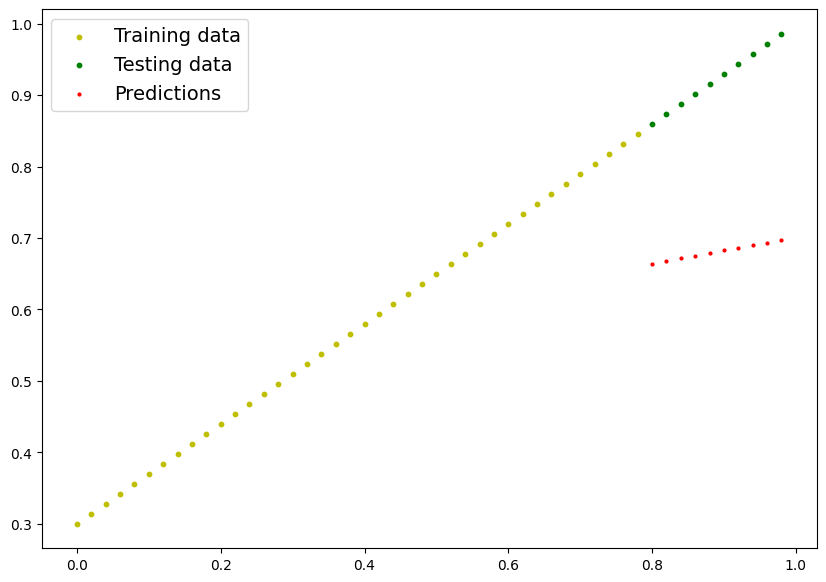

In [ ]:
#Visualise our model predictions
plot_predictions(predictions=y_preds.cpu())

In [ ]:
model_1.state_dict()

OrderedDict([('linear_layer.weight', tensor([[0.6954]])),
             ('linear_layer.bias', tensor([0.3093]))])

In [ ]:
weight, bias

(0.7, 0.3)

In [ ]:
#Turn model into evaluation mode
model_1.eval()

#Make predictions on the test data
with torch.inference_mode():
  y_preds = model_1(X_test)
y_preds

tensor([[0.8656],
        [0.8795],
        [0.8934],
        [0.9073],
        [0.9213],
        [0.9352],
        [0.9491],
        [0.9630],
        [0.9769],
        [0.9908]])

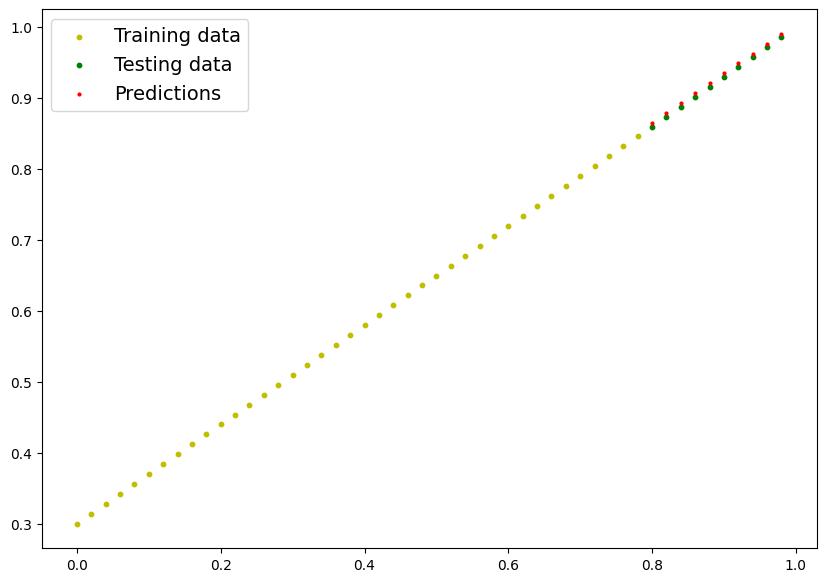

In [ ]:
plot_predictions(predictions=y_preds)

#Saving and loading a trained model

In [ ]:
from pathlib import Path

#Create models directory



In [ ]:
from google.colab import drive
drive.mount('/content/drive')